# 作業:
課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，
目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。

Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
Q2: 測試資料集是否有遺失值?
Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。

In [1]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, display_html

#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [2]:
#顯示圖形的函數，可不先不用理解，直接用
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [10]:
df_train = pd.read_csv('Titanic_train.csv')
df_test = pd.read_csv('Titanic_test.csv')

In [11]:
df_train.info()
df_test.info()

#test資料集無survived欄位

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [16]:
#可以嘗試用範例的程式
df_test.isnull().any()

#在Age、Fare、Cabin有遺失值

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [18]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
df_test.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。

In [25]:
df_all = pd.concat([df_train, df_test], axis = 0, join = 'outer', ignore_index = True)
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


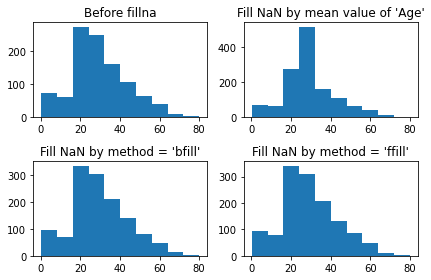

In [26]:
fig, axes = plt.subplots(2, 2)

axes[0, 0].hist(df_all['Age'])
axes[0, 0].set_title("Before fillna")

df_mean = df_all.copy()
df_mean['Age'] = df_mean['Age'].fillna(df_mean['Age'].mean())
axes[0, 1].hist(df_mean['Age'])
axes[0, 1].set_title("Fill NaN by mean value of 'Age'")

df_bfill = df_all.copy()
df_bfill['Age'] = df_bfill['Age'].fillna(method = 'bfill')
axes[1, 0].hist(df_bfill['Age'])
axes[1, 0].set_title("Fill NaN by method = 'bfill'")

df_ffill = df_all.copy()
df_ffill['Age'] = df_ffill['Age'].fillna(method = 'ffill')
axes[1, 1].hist(df_ffill['Age'])
axes[1, 1].set_title("Fill NaN by method = 'ffill'")

fig.tight_layout()

In [27]:
df_all.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [28]:
# Fill all NaN with "N"
df_N = df_all.copy()
df_N['Cabin'] = df_N['Cabin'].fillna("N")
df_N['Cabin'].isnull().any()

False

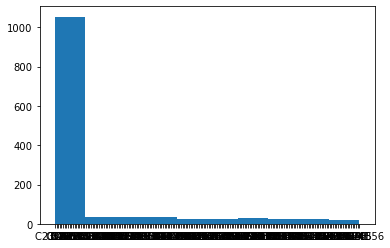

In [29]:
plt.hist(df_N["Cabin"])
plt.show()

In [ ]:
There are so many different kinds of cabins, we need to change a method to the visualization

I create a new column 'Cabin_new'

In [30]:
df_N['Cabin_new'] = df_N['Cabin'].str.slice(0, 1)
df_N.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_new
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,N
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,N
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,N


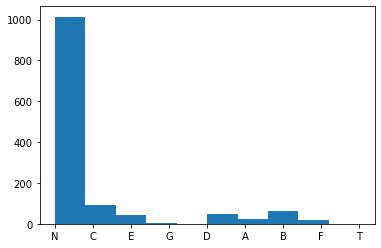

In [31]:
plt.hist(df_N["Cabin_new"])
plt.show()

As we can see, there so many NaN filled with 'N'

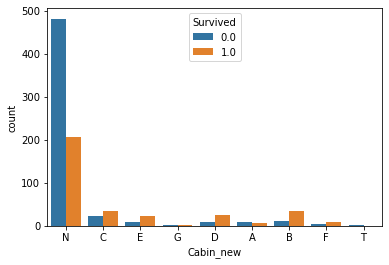

In [32]:
sns.countplot(data = df_N, x = 'Cabin_new', hue = 'Survived')
plt.show()

After applying 'Survived' to do an analysis, we can see that people lost 'Canbin' would have a higher probability to die

Now, I try to drop all 'Cabin' NaN

In [33]:
df_drop = df_all.copy()
df_drop['Cabin'] = df_drop['Cabin'].dropna()
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


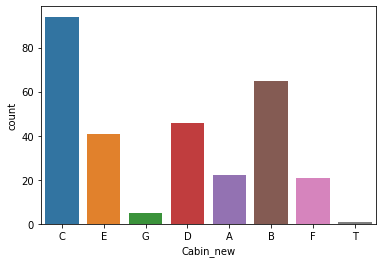

In [34]:
df_drop['Cabin_new'] = df_drop['Cabin'].str.slice(0, 1)
sns.countplot(data = df_drop, x = 'Cabin_new')
plt.show()

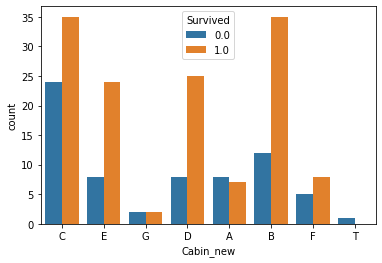

In [35]:
sns.countplot(data = df_drop, x = 'Cabin_new', hue = 'Survived')
plt.show()


As we can seen, Cabin C, E, D and B have a higher probability to survive

And make a conparison between these two kinds of fillna method, it is not obvious that which method is better, so we need to do much more analysis to test this data.